In [110]:
# Import Pandas package
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
# import warnings

Read CSV File

In [111]:
origin = pd.read_csv('../archive/steam.csv')

In [112]:
# Check for null in the dataframe
origin.isnull().sum()

appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64

In [113]:
# copy the main dataframe to keep as backup
game = origin.copy() 

In [121]:
game.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [114]:
class crawler:
    def __init__ (self, year=False, genres=False):        
        if year and genres:
            # Error handling for input provided
            if type(year) != str:
                self.year = str(year)
            else:
                self.year = year
            try:
                self.genres = genres.capitalize() # capitalize
            except:
                print("Please Enter genres in string")
                return
        
            print("Crawler Created", self.year, self.genres)
            print("use .showList to display list of data")
            print("use .getTopRating to display list of data and graph")
            print("use .getTopRatingDetails to display rating details for top number")
        else:
            print("Please enter genres and year of choice!")
    
    # Filter the data based on provided genre, year and no of top listed row 
    def showList(self, row=10):
        game = origin.copy()
        game = game[(game['genres'].str.contains(self.genres) & (game['price'] > 0))]
        
        # Filter the data based on release date(yeear) and average playtime
        game = game[pd.DatetimeIndex(game['release_date']).year == np.int64(self.year)]
        
        # get the difference ratings from the dataframe
        game['difference_ratings'] = game['positive_ratings'] - game['negative_ratings']
        
        # Filter data from negative return from difference ratings
        game = game[game['difference_ratings'] > 0].sort_values(by='difference_ratings', ascending=False).reset_index()
        self.game = game
        display(self.game[['name', 'release_date', 'developer', 'categories', 'genres', 'positive_ratings', 'negative_ratings','difference_ratings']].head(row))
    
    # Get the top rating game in the list and display the list of requested with bar chart for visualization
    def getTopRating(self, row=10):
        self.showList(row)
        # plot data 
        plt.barh(y=self.game['name'].head(row), width=self.game['difference_ratings'].head(row))
        plt.xlabel("Difference Ratings")
        plt.ylabel("Game Names")
        
    # Get top rating details and display the list accompany with pie chart for visualize the % negative and positive ratings
    def getTopRatingDetails(self, row=10):
        self.showList(row)
        dataLabels = ['positive', 'negative']
        myexplode = [0.2, 0]
        color = ['#99ff99', '#ff9999']
        sRow = 1
        pPlot= 1
        for i in range(row):
            if i%2 == 0 :
                plt.figure(int(i/2))
                pPlot = 1
            # Run just once!
            if i == 0:
                # Create Title
                plt.suptitle("RATING PERCENTAGE")
            # Get Column location
            pCol = self.game.columns.get_loc('positive_ratings')
            nCol = self.game.columns.get_loc('negative_ratings')
            # save the column data into data as list
            data = ([self.game.iloc[i,pCol], self.game.iloc[i,nCol]])
            # Plot pie Chart
            plt.subplot(sRow,2,pPlot)
            plt.pie(data, colors=color, explode=myexplode, autopct='%.1f%%');
            rName =self.game.iloc[i,self.game.columns.get_loc('name')]
            plt.title(rName)
            pPlot+=1
            plt.legend(dataLabels)
                
#         plt.tight_layout() # to adjust padding
        plt.show()
            
        

In [123]:
# Start
info = crawler(genres="Action", year="2016")

Crawler Created 2016 Action
use .showList to display list of data
use .getTopRating to display list of data and graph
use .getTopRatingDetails to display rating details for top number


,name,release_date,developer,categories,genres,positive_ratings,negative_ratings,difference_ratings
0,Dead by Daylight,2016-06-14,Behaviour Digital Inc.,Multi-player;Online Multi-Player;Co-op;Online ...,Action,140721,44985,95736
1,DARK SOULS™ III,2016-04-11,"FromSoftware, Inc.",Single-player;Multi-player;Co-op;Steam Achieve...,Action,100412,9953,90459
2,Starbound,2016-07-22,Chucklefish,Single-player;Multi-player;Online Multi-Player...,Action;Adventure;Casual;Indie;RPG,74162,7816,66346
3,DOOM,2016-05-12,id Software,Single-player;Multi-player;Co-op;Steam Achieve...,Action,68536,5156,63380
4,Killing Floor 2,2016-11-18,Tripwire Interactive,Single-player;Multi-player;Online Multi-Player...,Action,60917,8354,52563


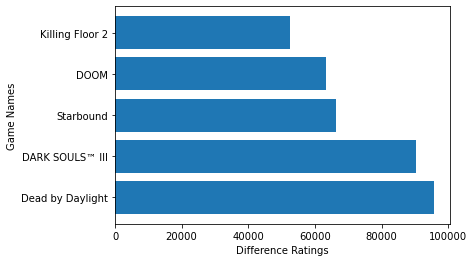

In [124]:
# Show first top 5 Data from the dataframe and display bar graph 
info.getTopRating(5)

In [128]:
# show list of top ratings games listed based on number of row requested 
info.showList(10)

,name,release_date,developer,categories,genres,positive_ratings,negative_ratings,difference_ratings
0,Dead by Daylight,2016-06-14,Behaviour Digital Inc.,Multi-player;Online Multi-Player;Co-op;Online ...,Action,140721,44985,95736
1,DARK SOULS™ III,2016-04-11,"FromSoftware, Inc.",Single-player;Multi-player;Co-op;Steam Achieve...,Action,100412,9953,90459
2,Starbound,2016-07-22,Chucklefish,Single-player;Multi-player;Online Multi-Player...,Action;Adventure;Casual;Indie;RPG,74162,7816,66346
3,DOOM,2016-05-12,id Software,Single-player;Multi-player;Co-op;Steam Achieve...,Action,68536,5156,63380
4,Killing Floor 2,2016-11-18,Tripwire Interactive,Single-player;Multi-player;Online Multi-Player...,Action,60917,8354,52563
5,Rise of the Tomb Raider™,2016-02-09,Crystal Dynamics;Eidos-Montréal;Feral Interact...,Single-player;Steam Achievements;Full controll...,Action;Adventure,49004,3838,45166
6,Tom Clancy’s The Division™,2016-03-07,Massive Entertainment,Single-player;Multi-player;Co-op;Steam Trading...,Action;Adventure;RPG,49832,25607,24225
7,Grim Dawn,2016-02-25,Crate Entertainment,Single-player;Multi-player;Co-op;Steam Achieve...,Action;Adventure;Indie;RPG,26805,2605,24200
8,Enter the Gungeon,2016-04-05,Dodge Roll,Single-player;Shared/Split Screen;Steam Achiev...,Action;Adventure;Indie,24947,1573,23374
9,Total War: WARHAMMER,2016-05-24,CREATIVE ASSEMBLY;Feral Interactive (Linux);Fe...,Single-player;Multi-player;Steam Achievements;...,Action;Strategy,29826,9878,19948


,name,release_date,developer,categories,genres,positive_ratings,negative_ratings,difference_ratings
0,Dead by Daylight,2016-06-14,Behaviour Digital Inc.,Multi-player;Online Multi-Player;Co-op;Online ...,Action,140721,44985,95736
1,DARK SOULS™ III,2016-04-11,"FromSoftware, Inc.",Single-player;Multi-player;Co-op;Steam Achieve...,Action,100412,9953,90459
2,Starbound,2016-07-22,Chucklefish,Single-player;Multi-player;Online Multi-Player...,Action;Adventure;Casual;Indie;RPG,74162,7816,66346
3,DOOM,2016-05-12,id Software,Single-player;Multi-player;Co-op;Steam Achieve...,Action,68536,5156,63380
4,Killing Floor 2,2016-11-18,Tripwire Interactive,Single-player;Multi-player;Online Multi-Player...,Action,60917,8354,52563


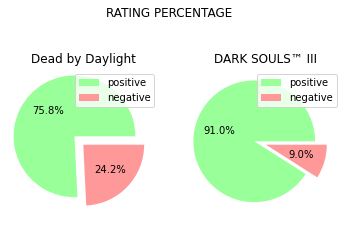

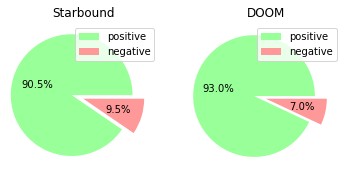

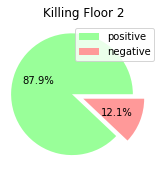

In [127]:
# Get the top rating details displayed on pie chart which visualize the positive and negative ratings on each game for requested number of row
info.getTopRatingDetails(5)

In [119]:
origin.shape

(27075, 18)